In [18]:
import pandas as pd
import numpy as np

## basic exploration

In [2]:
rdt = pd.read_csv('2017-2021.csv')

In [3]:
rdt.head()

,id,body,author,created_utc,score,parent_id,sentiment
0,hib6j42,"""If I wanted to get emotionally battered and f...",pylori,1.635376e+09,31,t1_hiarxtg,-0.6597
1,hib6cul,I think there’s a few things:\n\n- I had such ...,sjcowell,1.635376e+09,2,t1_hi89pmm,0.9948
2,hib656j,I rarely hear it from doctors. Most have been...,tomdidiot,1.635375e+09,4,t3_qh1cmf,-0.9217
3,hib64ok,and what about CO2 and monitoring? \n\na ward ...,pylori,1.635375e+09,0,t1_hia9nht,-0.6440
4,hib5vfd,"Conscious or not, it’s not the truth. You’ll m...",materaminol95,1.635375e+09,15,t1_hia1fl7,-0.8254


In [4]:
rdt.shape

(131562, 7)

In [5]:
rdt.sentiment.describe()

count    131562.000000
mean          0.211022
std           0.497592
min          -0.999200
25%           0.000000
50%           0.138450
75%           0.648600
max           0.999500
Name: sentiment, dtype: float64

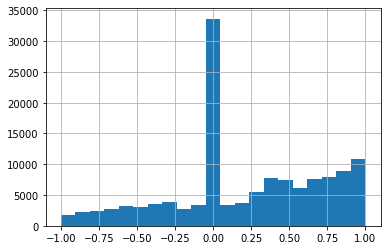

In [6]:
rdt['sentiment'].hist(bins=21);

In [29]:
neutral = rdt.loc[np.all([rdt['sentiment'] >= -0.05, rdt['sentiment'] <= 0.05], axis=0)] 

In [34]:
nonneutral = rdt.loc[np.any([rdt['sentiment'] < -0.05, rdt['sentiment'] > 0.05], axis=0)] 

In [85]:
negative = nonneutral.loc[nonneutral['sentiment']<-0.05]

In [86]:
positive = nonneutral.loc[nonneutral['sentiment']>0.05]

In [39]:
neutral.shape[0]

33708

In [42]:
neutral.shape[0]/rdt.shape[0]

0.2562138003374835

In [40]:
nonneutral.shape[0]

97854

In [87]:
#number of negative comments
negative.shape[0]

28916

In [88]:
#proportion
negative.shape[0]/rdt.shape[0]

0.2197899089402715

In [89]:
#positive comments
positive.shape[0]

68938

In [90]:
positive.shape[0]/rdt.shape[0]

0.5239962907222451

## looking at votes grouped by sentiment

In [92]:
#negative sentiment scores
negative['score'].mean()

9.935814082169042

In [93]:
neutral['score'].mean()

6.313278746885013

In [94]:
positive['score'].mean()

7.265760538454844

## looking at top 20 authors

In [59]:
top20 = rdt['author'].value_counts().head(20).index

In [60]:
#comparing sentiment for top 20 authors versus the rest
rdt.loc[rdt['author'].isin(top20),'sentiment'].mean()

0.20435012031466895

In [61]:
rdt.loc[~rdt['author'].isin(top20),'sentiment'].mean()

0.21233316265279242

In [62]:
#comparing sentiment after removing nonneutral comments
nonneutral.loc[nonneutral['author'].isin(top20),'sentiment'].mean()

0.23801636569457138

In [63]:
nonneutral.loc[~nonneutral['author'].isin(top20),'sentiment'].mean()

0.29437812693088383

In [44]:
#getting an author comment counts dataframe
author_counts = pd.DataFrame(rdt['author'].value_counts())
author_counts.index.name = 'author'
author_counts.columns =['count']

In [45]:
#looking at sentiment vs. author comment count
snt_mean = rdt[['author','sentiment']].groupby('author').mean()

In [46]:
count_sentiment = pd.merge(snt_mean, author_counts, on='author')

In [47]:
count_sentiment.corr() # no correlation between count and average sentiment

,sentiment,count
sentiment,1.00000,-0.02839
count,-0.02839,1.00000


In [ ]:
#same analysis, only using authors with 100+ comments

In [198]:
author_counts.shape[0] #6766 authors

(6766, 1)

In [201]:
sum(author_counts['count']>=100) #219 of which have >= comments

219

In [202]:
count_sentiment_100 = pd.merge(snt_mean, author_counts[author_counts['count']>=100], on='author')

In [207]:
count_sentiment_100.corr()

,sentiment,count
sentiment,1.000000,-0.036264
count,-0.036264,1.000000


In [75]:
#looking at comment count versus score (unlikely to be applicable, more for my curiosity)

score_mean = rdt[['author','score']].groupby('author').mean()

In [76]:
count_score = pd.merge(score_mean, author_counts, on='author')

In [78]:
count_score.corr()

,score,count
score,1.000000,0.065998
count,0.065998,1.000000


## parent comment exploration

In [65]:
first_ids = rdt['parent_id'].apply(lambda c: c.startswith('t3'))

In [66]:
reply_ids = rdt['parent_id'].apply(lambda c: c.startswith('t1'))

In [97]:
first_ids_nn = nonneutral['parent_id'].apply(lambda c: c.startswith('t3'))

In [98]:
reply_ids_nn = nonneutral['parent_id'].apply(lambda c: c.startswith('t1'))

In [101]:
sum(reply_ids)

80510

In [79]:
#proportion of comments which are replies as opposed to top level comments
reply_ids.mean()

0.6119548197807878

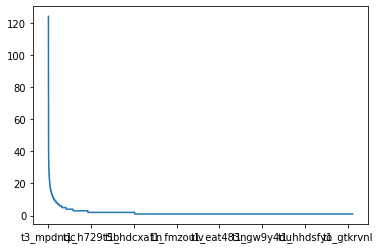

In [80]:
rdt['parent_id'].value_counts().plot();

In [81]:
#sentiment slightly higher for top level comments
rdt.loc[first_ids, 'sentiment'].mean()

0.22882180717699613

In [82]:
rdt.loc[reply_ids, 'sentiment'].mean()

0.19973482921375768

In [102]:
#sentiment for nonneutral comments;consistent results
nonneutral.loc[first_ids_nn, 'sentiment'].mean()

0.30341125772767424

In [103]:
nonneutral.loc[reply_ids_nn, 'sentiment'].mean()

0.2709040973111334

In [134]:
#vote counts
rdt.loc[first_ids, 'score'].mean()

10.863923058841966

In [135]:
rdt.loc[reply_ids, 'score'].mean()

5.544329896907216

In [107]:
#exploring relation between parent and reply sentiment
def parent_sentiment(c):
    comment_id = c['parent_id'][3:]
    parent = rdt.loc[rdt['id'] == comment_id, 'sentiment'].values
    if len(parent) == 1:
        return parent[0]
    else:
        return None

In [108]:
nn_parent_sentiments = nonneutral.loc[reply_ids_nn].apply(parent_sentiment,axis=1)

In [110]:
nonneutral['parent_sentiment'] = nn_parent_sentiments

C:\Users\tamir\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
nonneutral[['sentiment','parent_sentiment']].corr()

,sentiment,parent_sentiment
sentiment,1.000000,0.167561
parent_sentiment,0.167561,1.000000


In [184]:
parent_sentiments = rdt.loc[reply_ids].apply(parent_sentiment,axis=1)

In [194]:
rdt['parent_sentiment'] = parent_sentiments

In [196]:
rdt[['sentiment','parent_sentiment']].corr()

,sentiment,parent_sentiment
sentiment,1.000000,0.153304
parent_sentiment,0.153304,1.000000
